In [25]:
library(Seurat)
library(tidyverse)
library(patchwork)

In [26]:
obj_other = qs::qread('obj_cb_other_00')
obj_other

An object of class Seurat 
25033 features across 29782 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [27]:
obj = obj_other

In [28]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1"

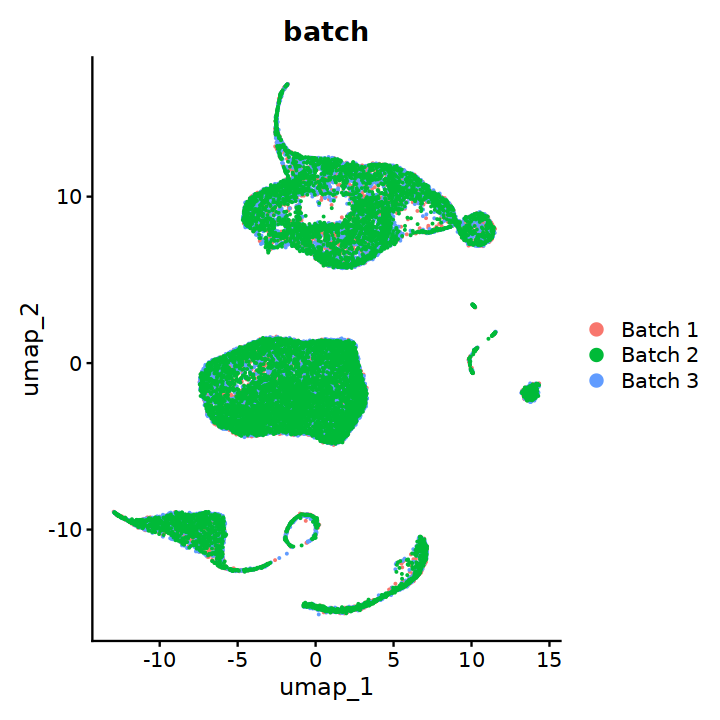

In [29]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=F, repel = T)

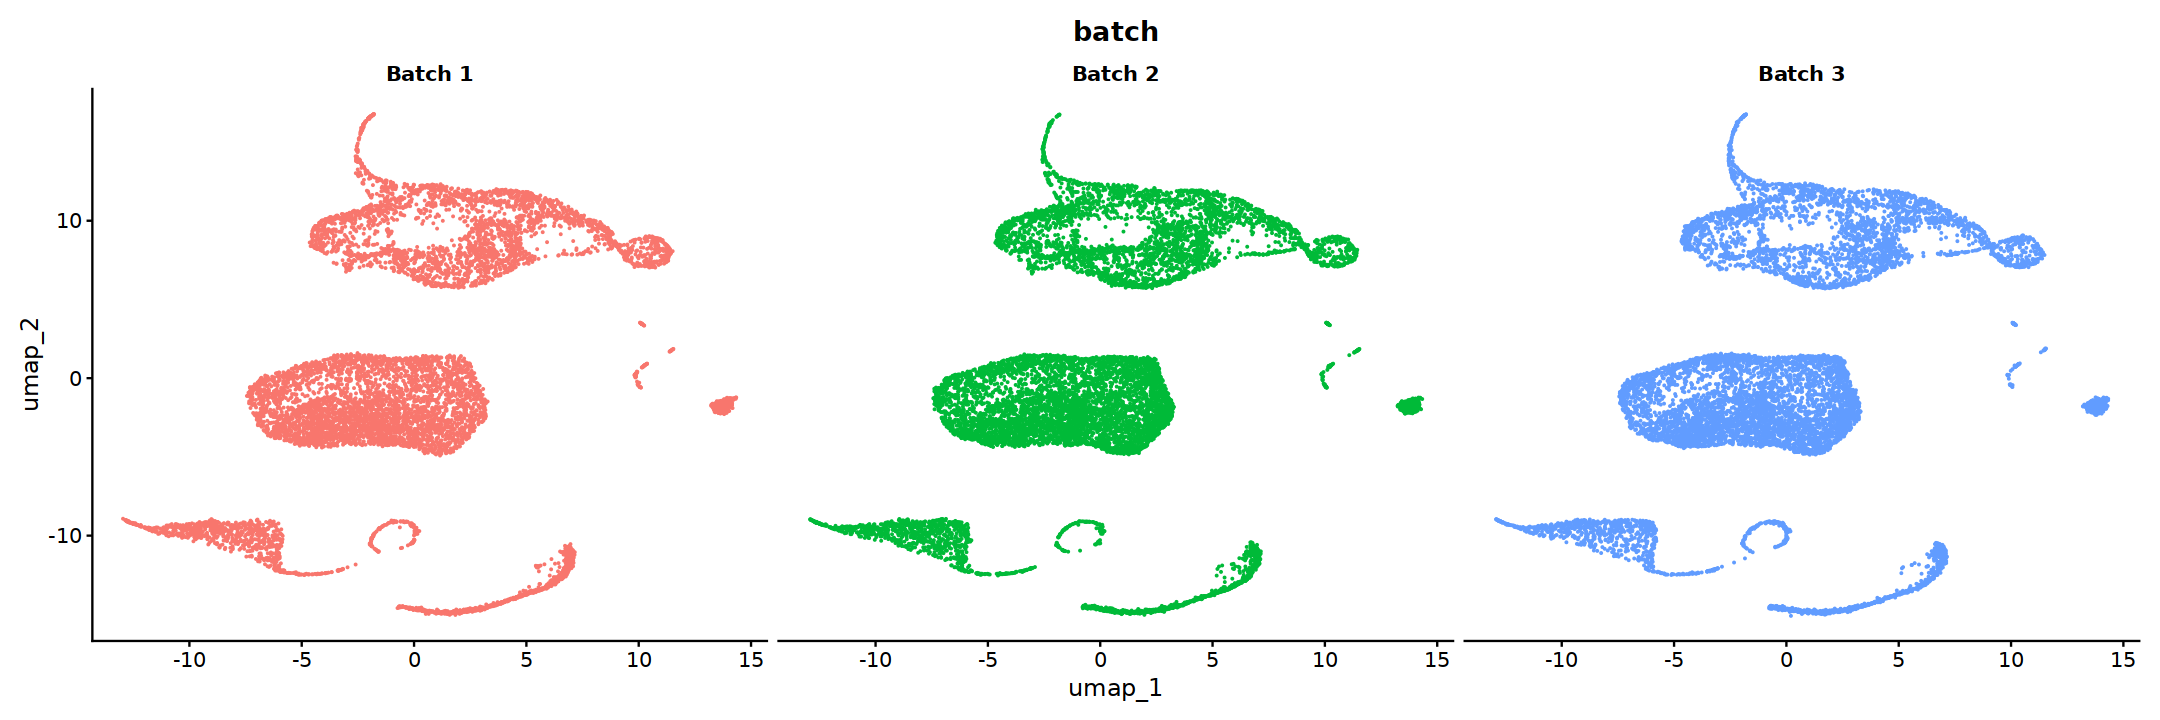

In [30]:
options(repr.plot.width=18, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', split.by='batch', label=F, repel = T) + NoLegend()

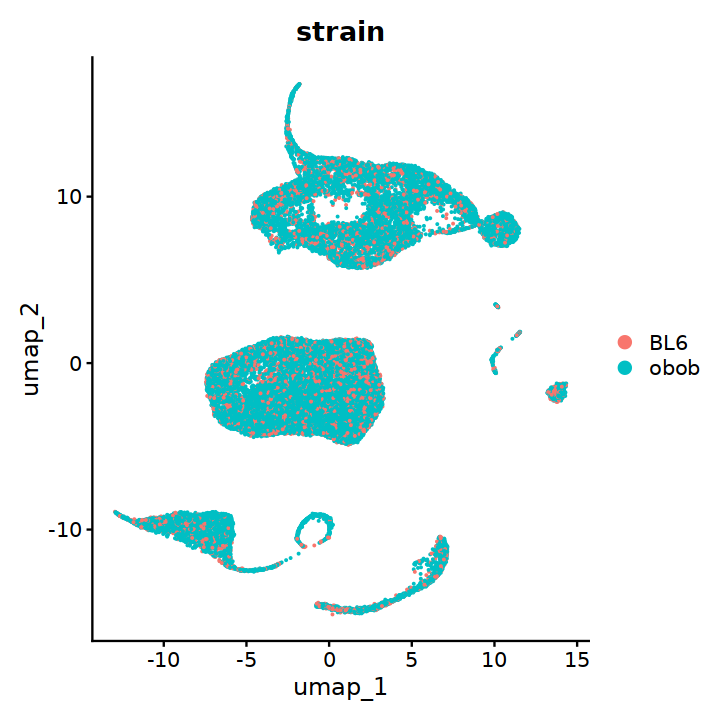

In [31]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='strain', label=F, repel = T)

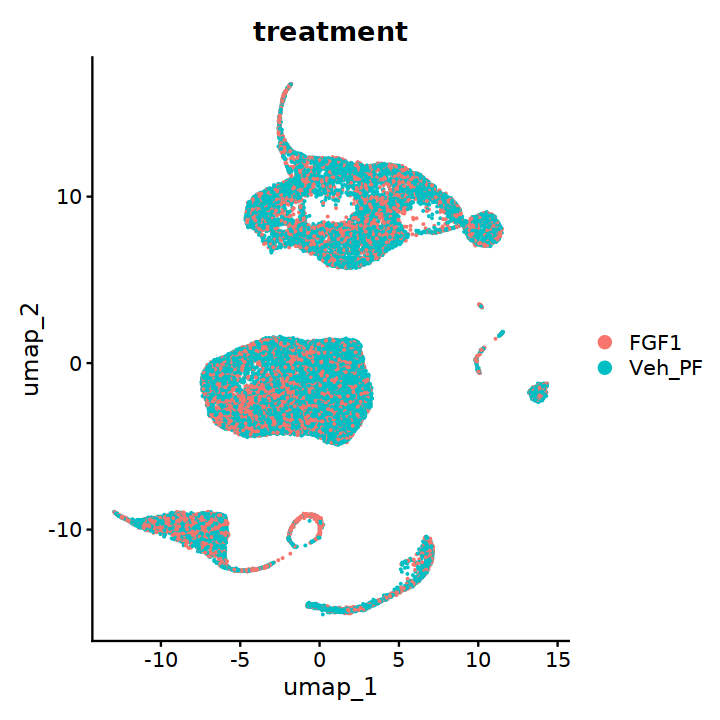

In [32]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='treatment', label=F, repel = T)

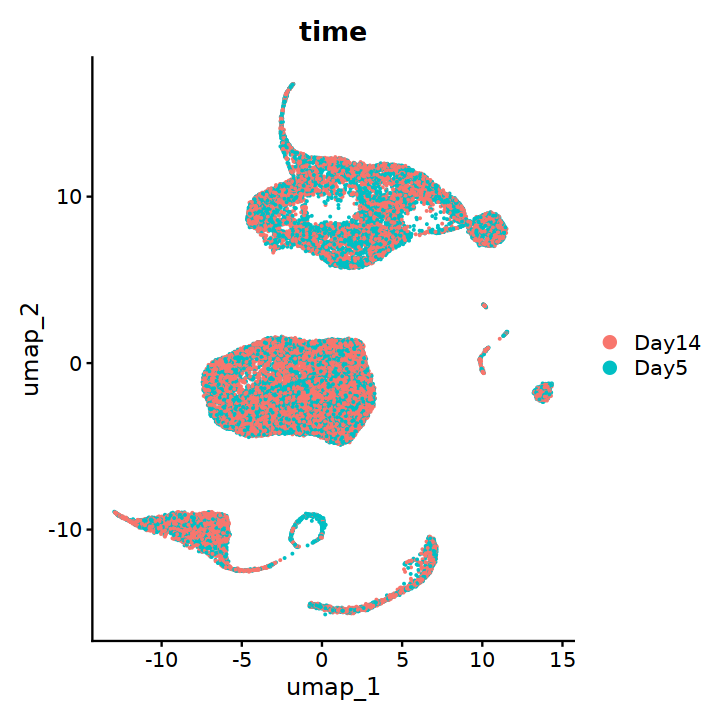

In [33]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='time', label=F, repel = T)

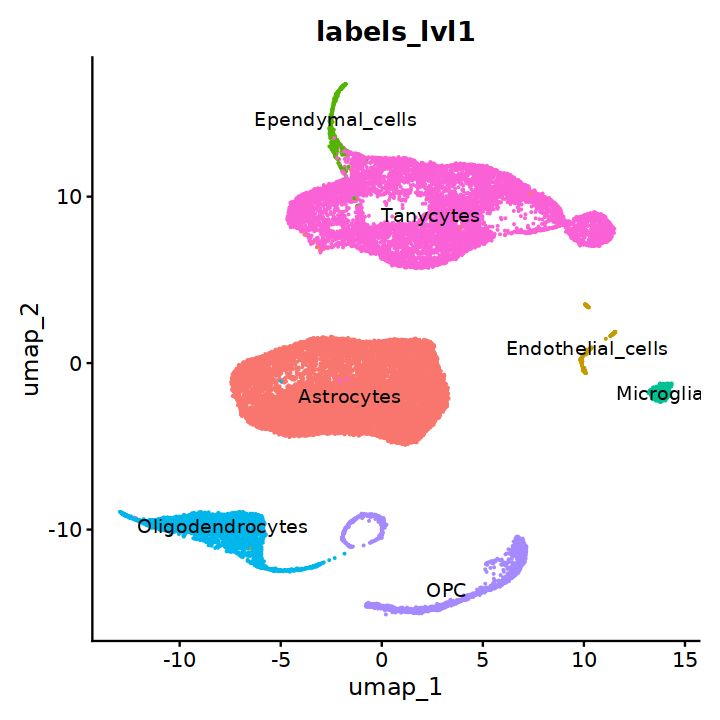

In [34]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()

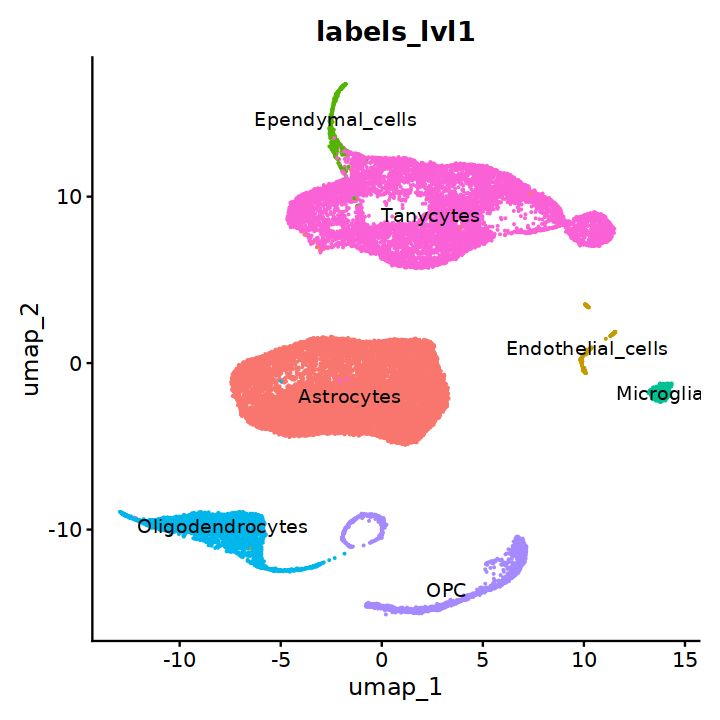

In [35]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()

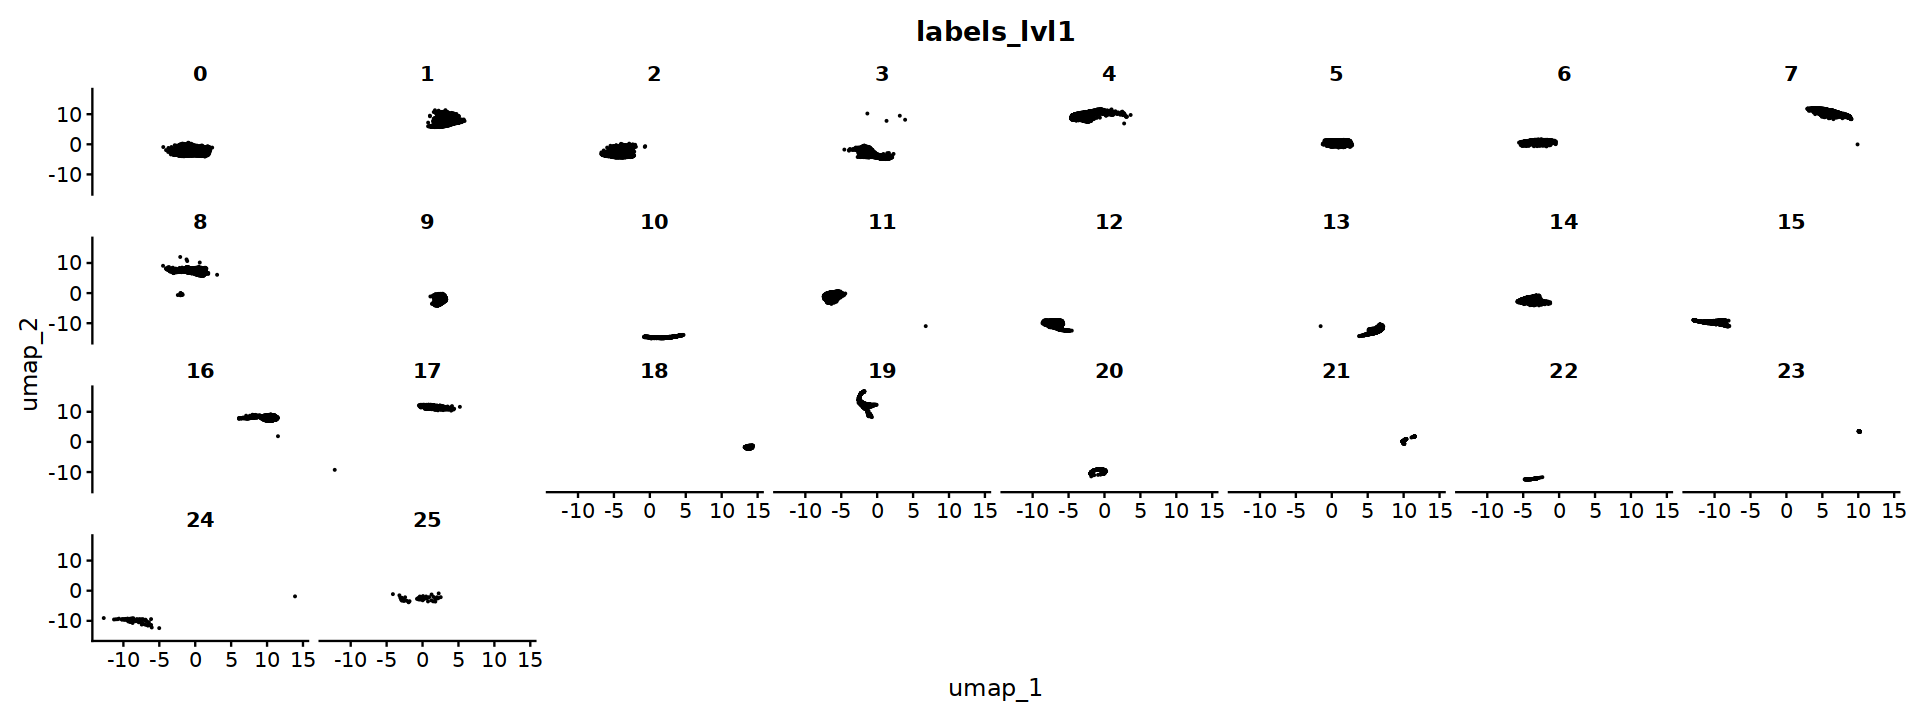

In [36]:
options(repr.plot.width=16, repr.plot.height=6)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_lvl1', label=F, split.by='seurat_clusters', ncol=8) + NoLegend()

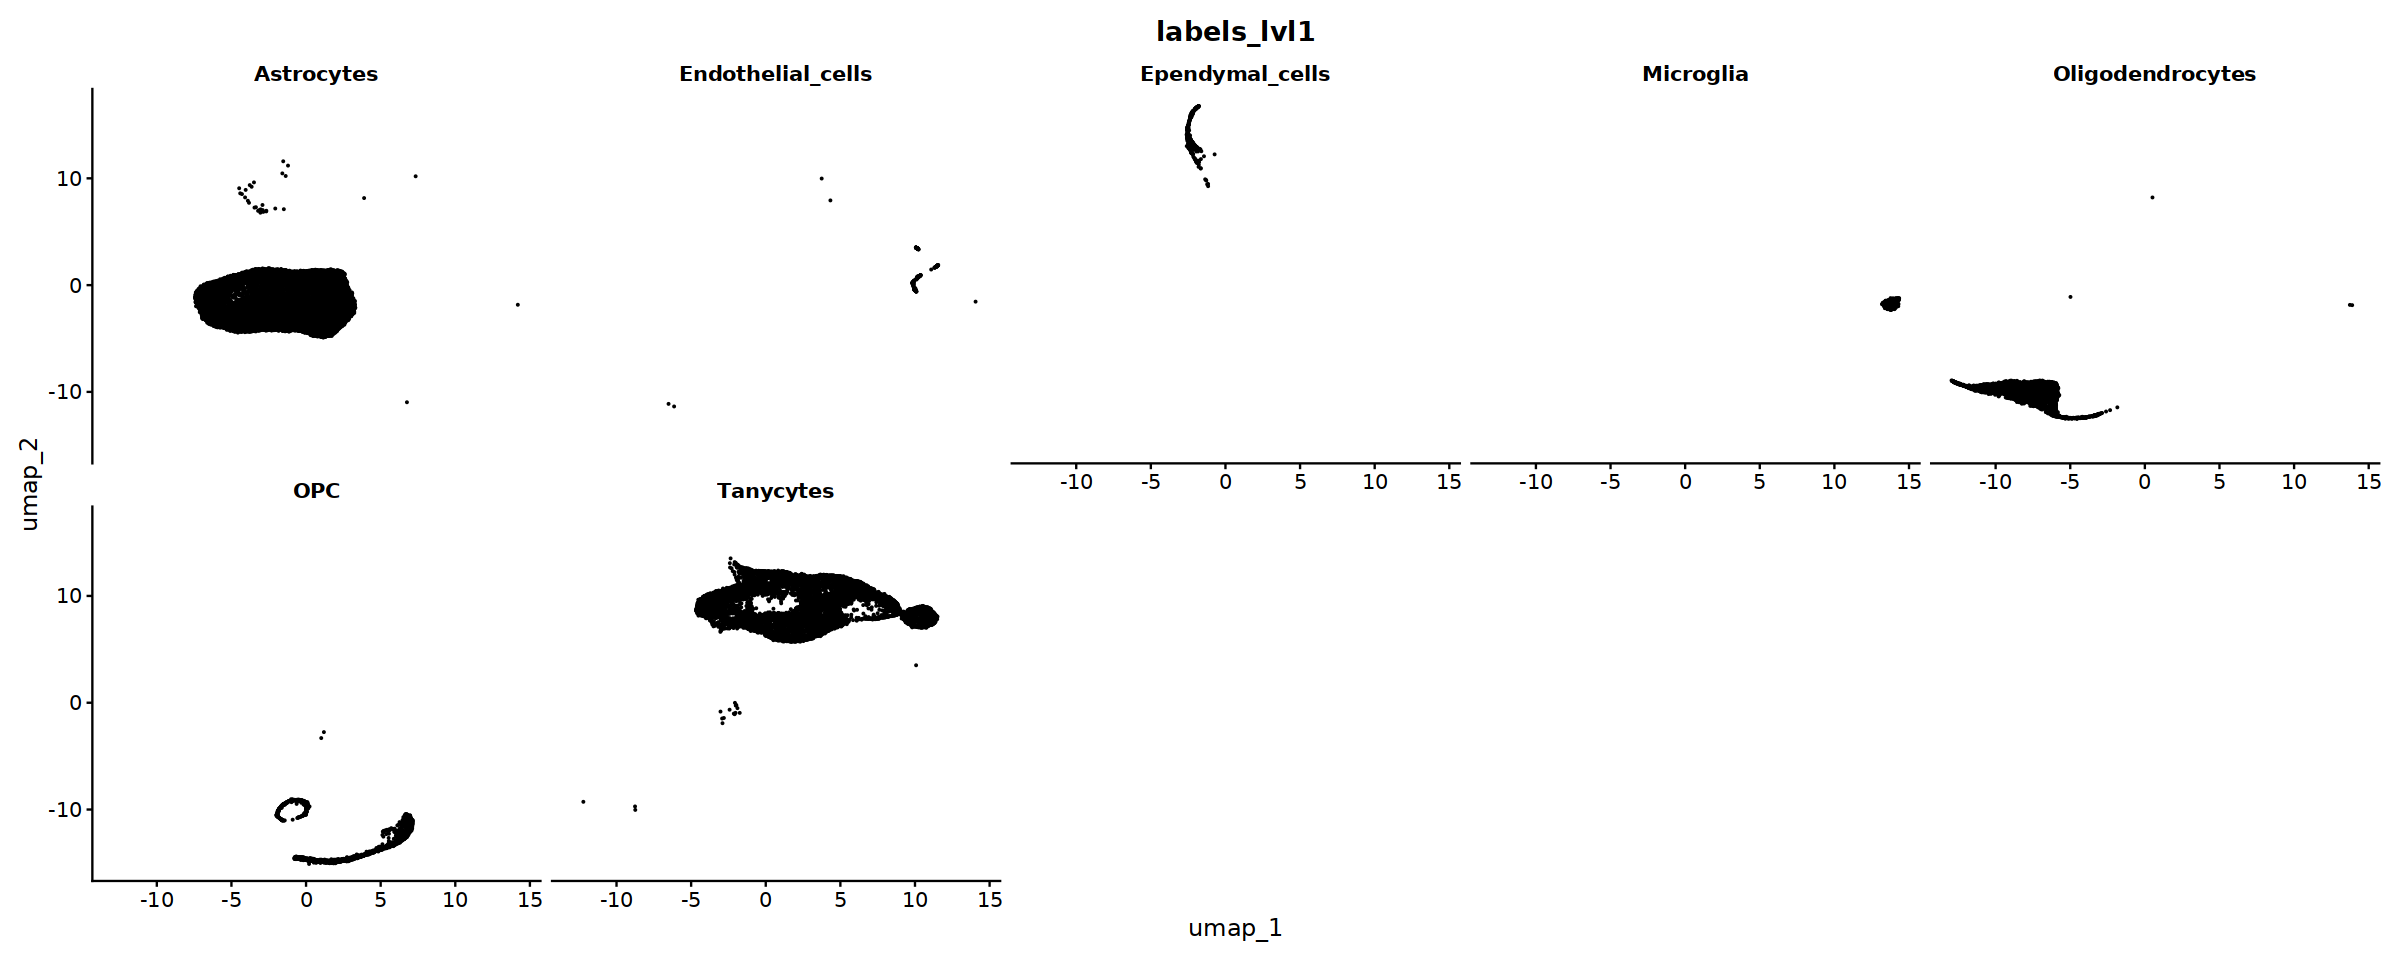

In [37]:
options(repr.plot.width=20, repr.plot.height=8)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_lvl1', ncol=5) + NoLegend()

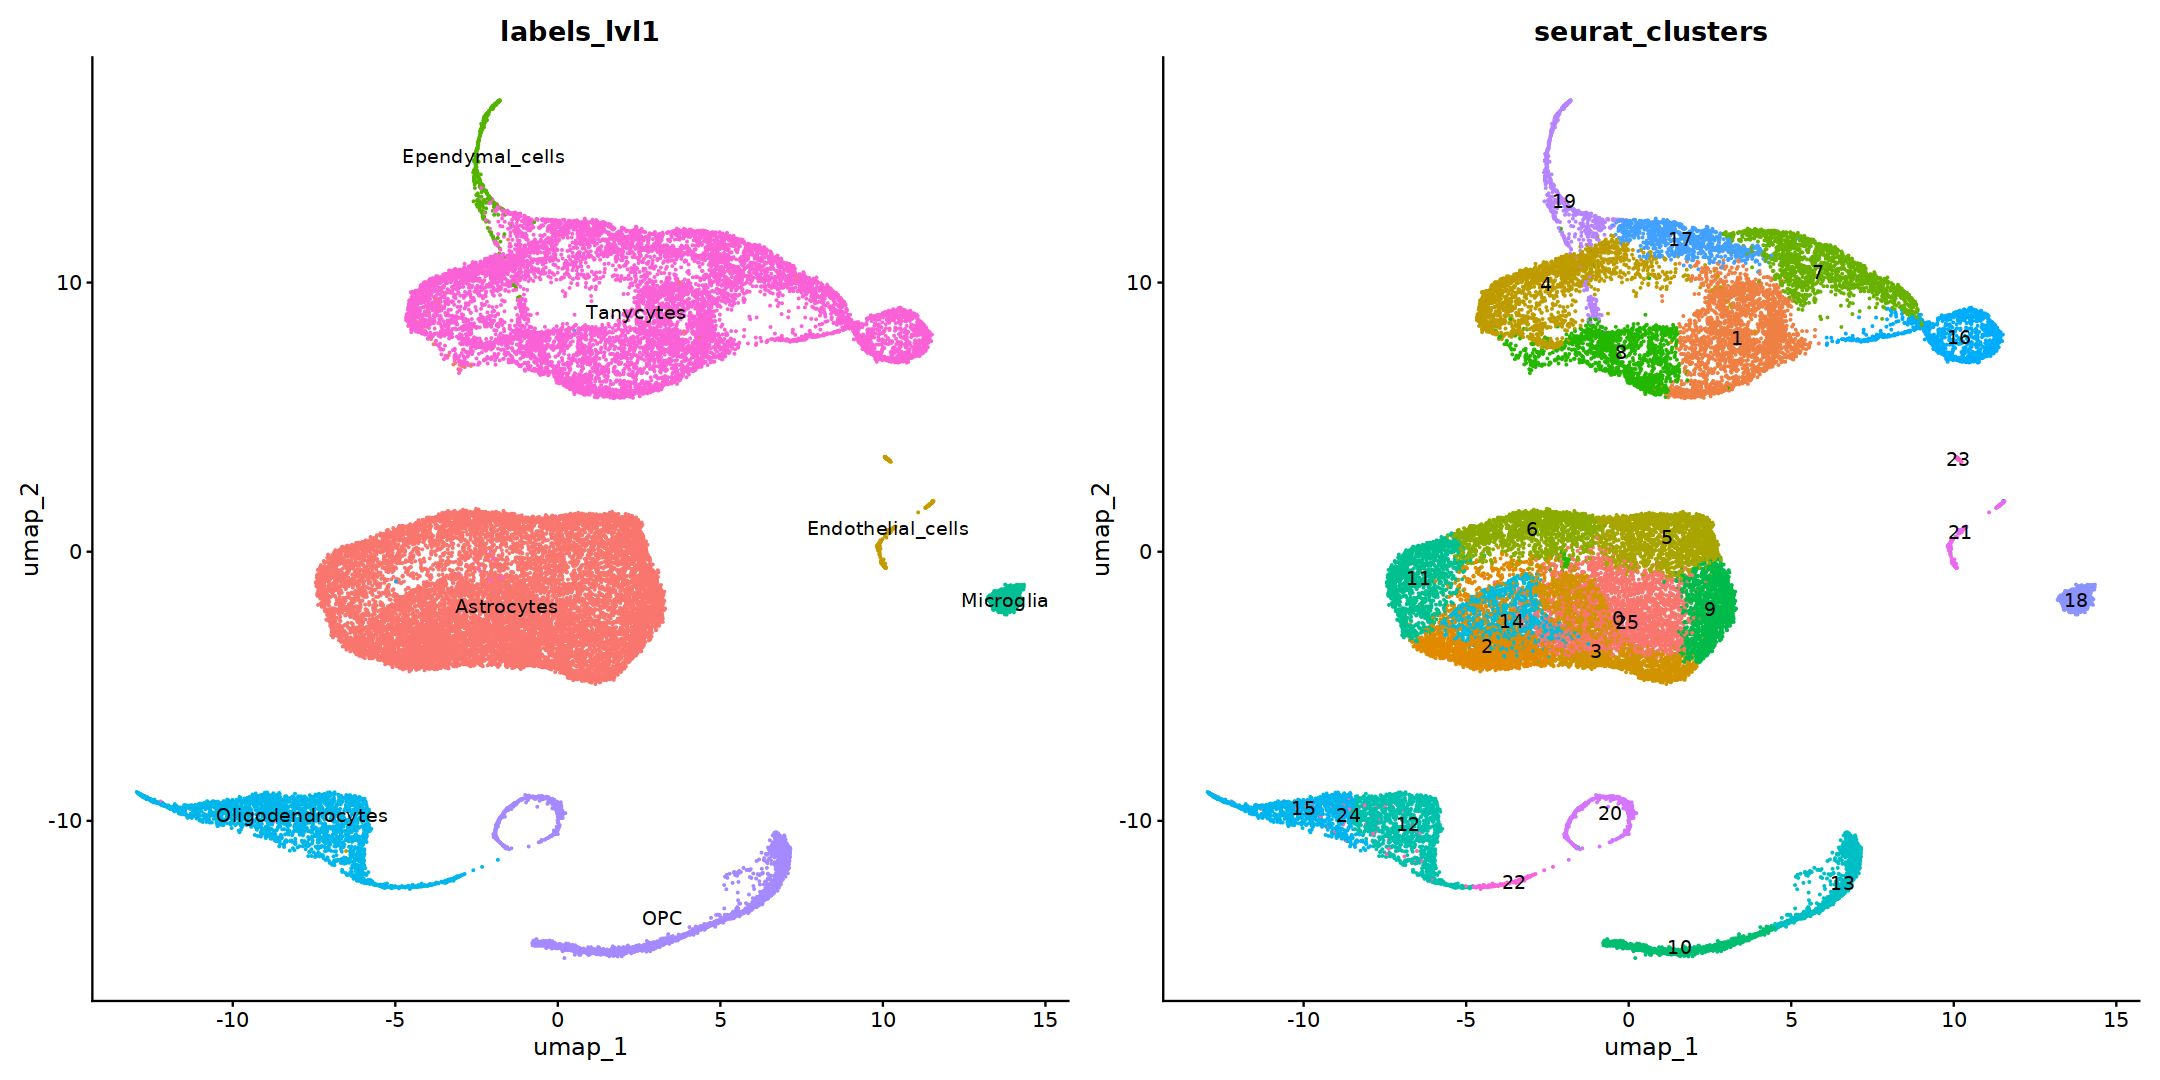

In [38]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [57]:
labels_chunk = obj %>%
`[[` %>%
mutate(labels_chunk = case_when(labels_lvl1 %in% c("Ependymal_cells", "Tanycytes") & seurat_clusters %in% c(19, 17, 7, 16, 4, 8, 1) ~ 'g1',
                                labels_lvl1 %in% c("Astrocytes") & seurat_clusters %in% c(11, 6, 5, 14, 2, 3, 0, 25, 9)  ~ 'g2',
                                labels_lvl1 %in% c("Oligodendrocytes", "OPC") & seurat_clusters %in% c(15, 24, 12, 22, 20, 10, 13) ~ 'g3',
                                labels_lvl1 %in% c("Microglia") & seurat_clusters %in% c(18) ~ 'g4',
                                labels_lvl1 %in% c("Pericytes") ~ 'g5',
                                labels_lvl1 %in% c("VLMC") & seurat_clusters %in% c(20) ~ 'g6',
                                labels_lvl1 %in% c("Endothelial_cells") & seurat_clusters %in% c(23) ~ 'g7',
                                TRUE ~ 'g_drop')) %>%
select(labels_chunk)

labels_chunk %>% qs::qsave('labels_chunk_other.qs')

In [54]:
obj = obj %>% AddMetaData(labels_chunk)

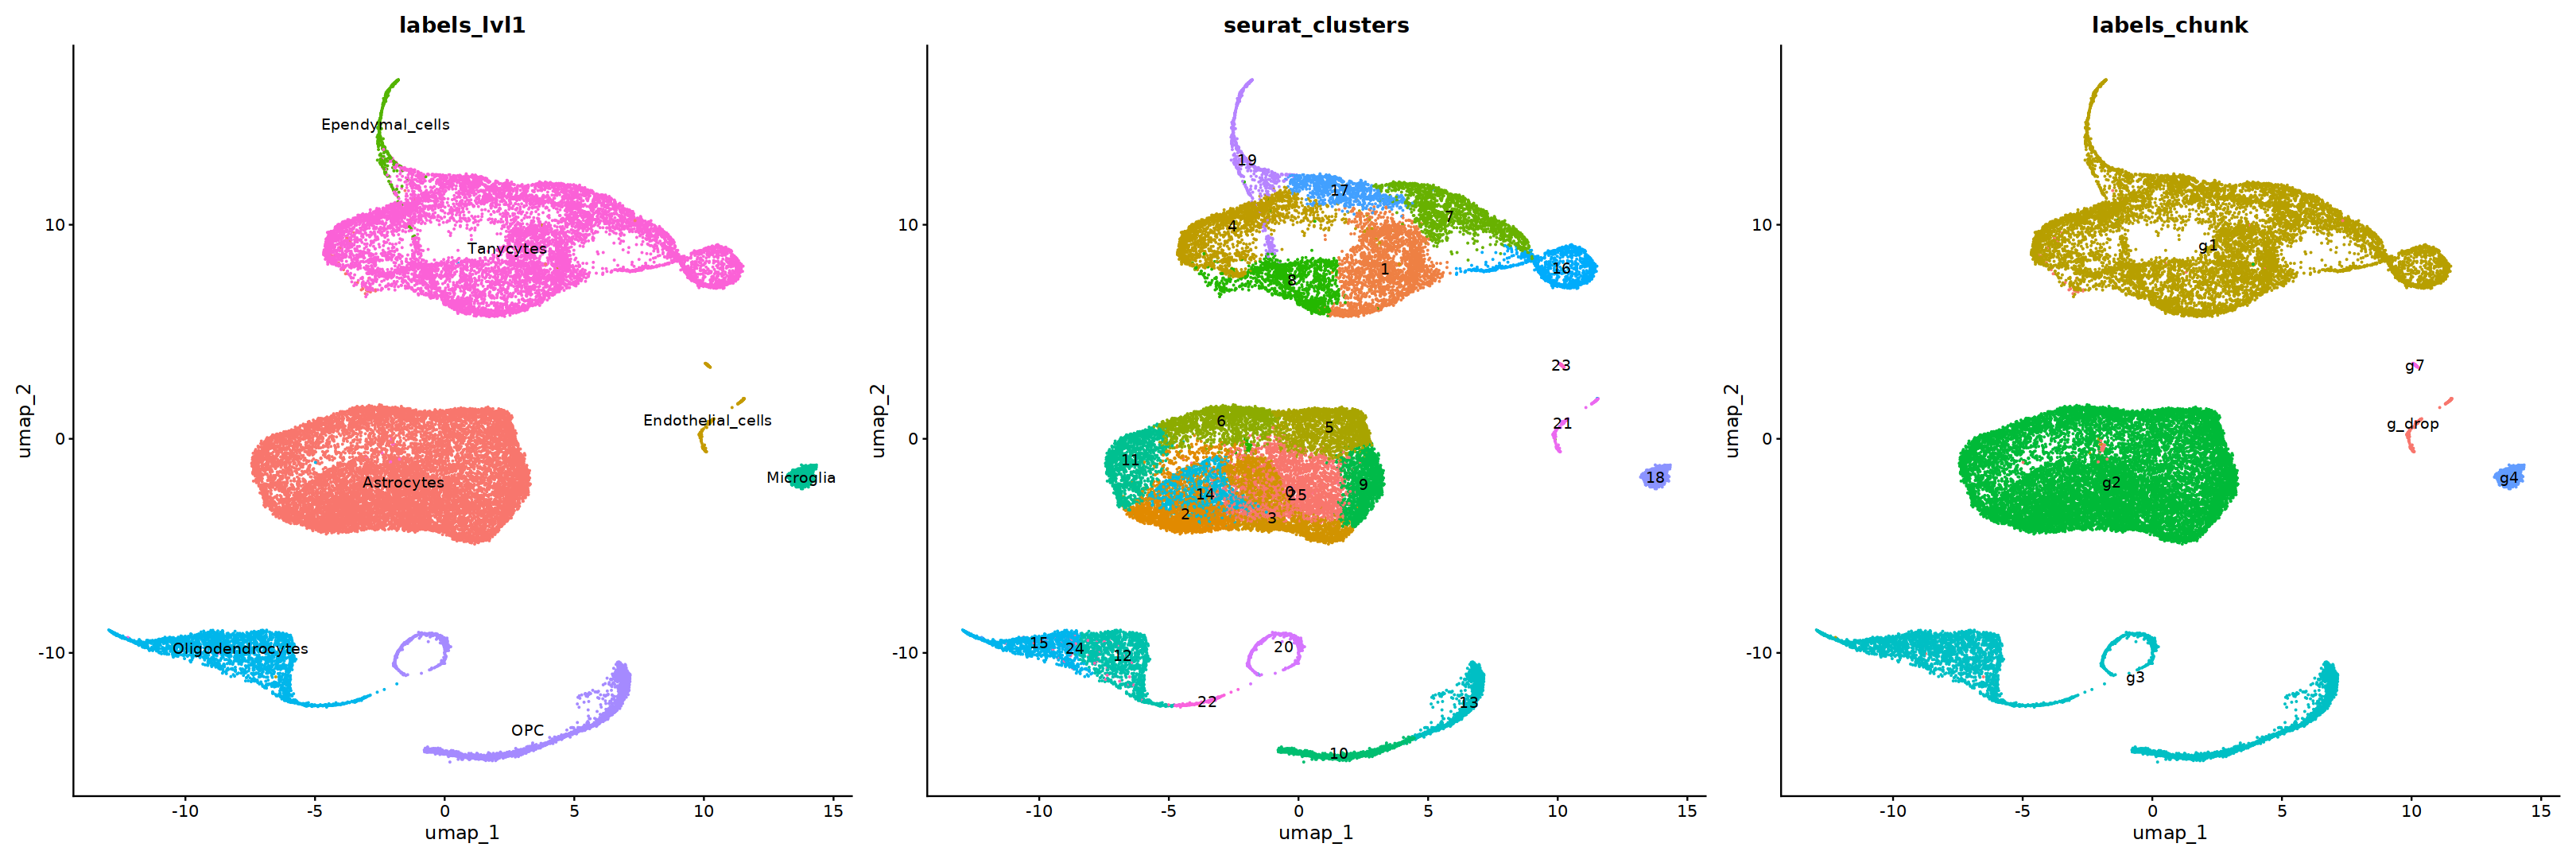

In [55]:
options(repr.plot.width=27, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_chunk = DimPlot(obj, reduction = "umap", group.by='labels_chunk', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters + p_labels_chunk

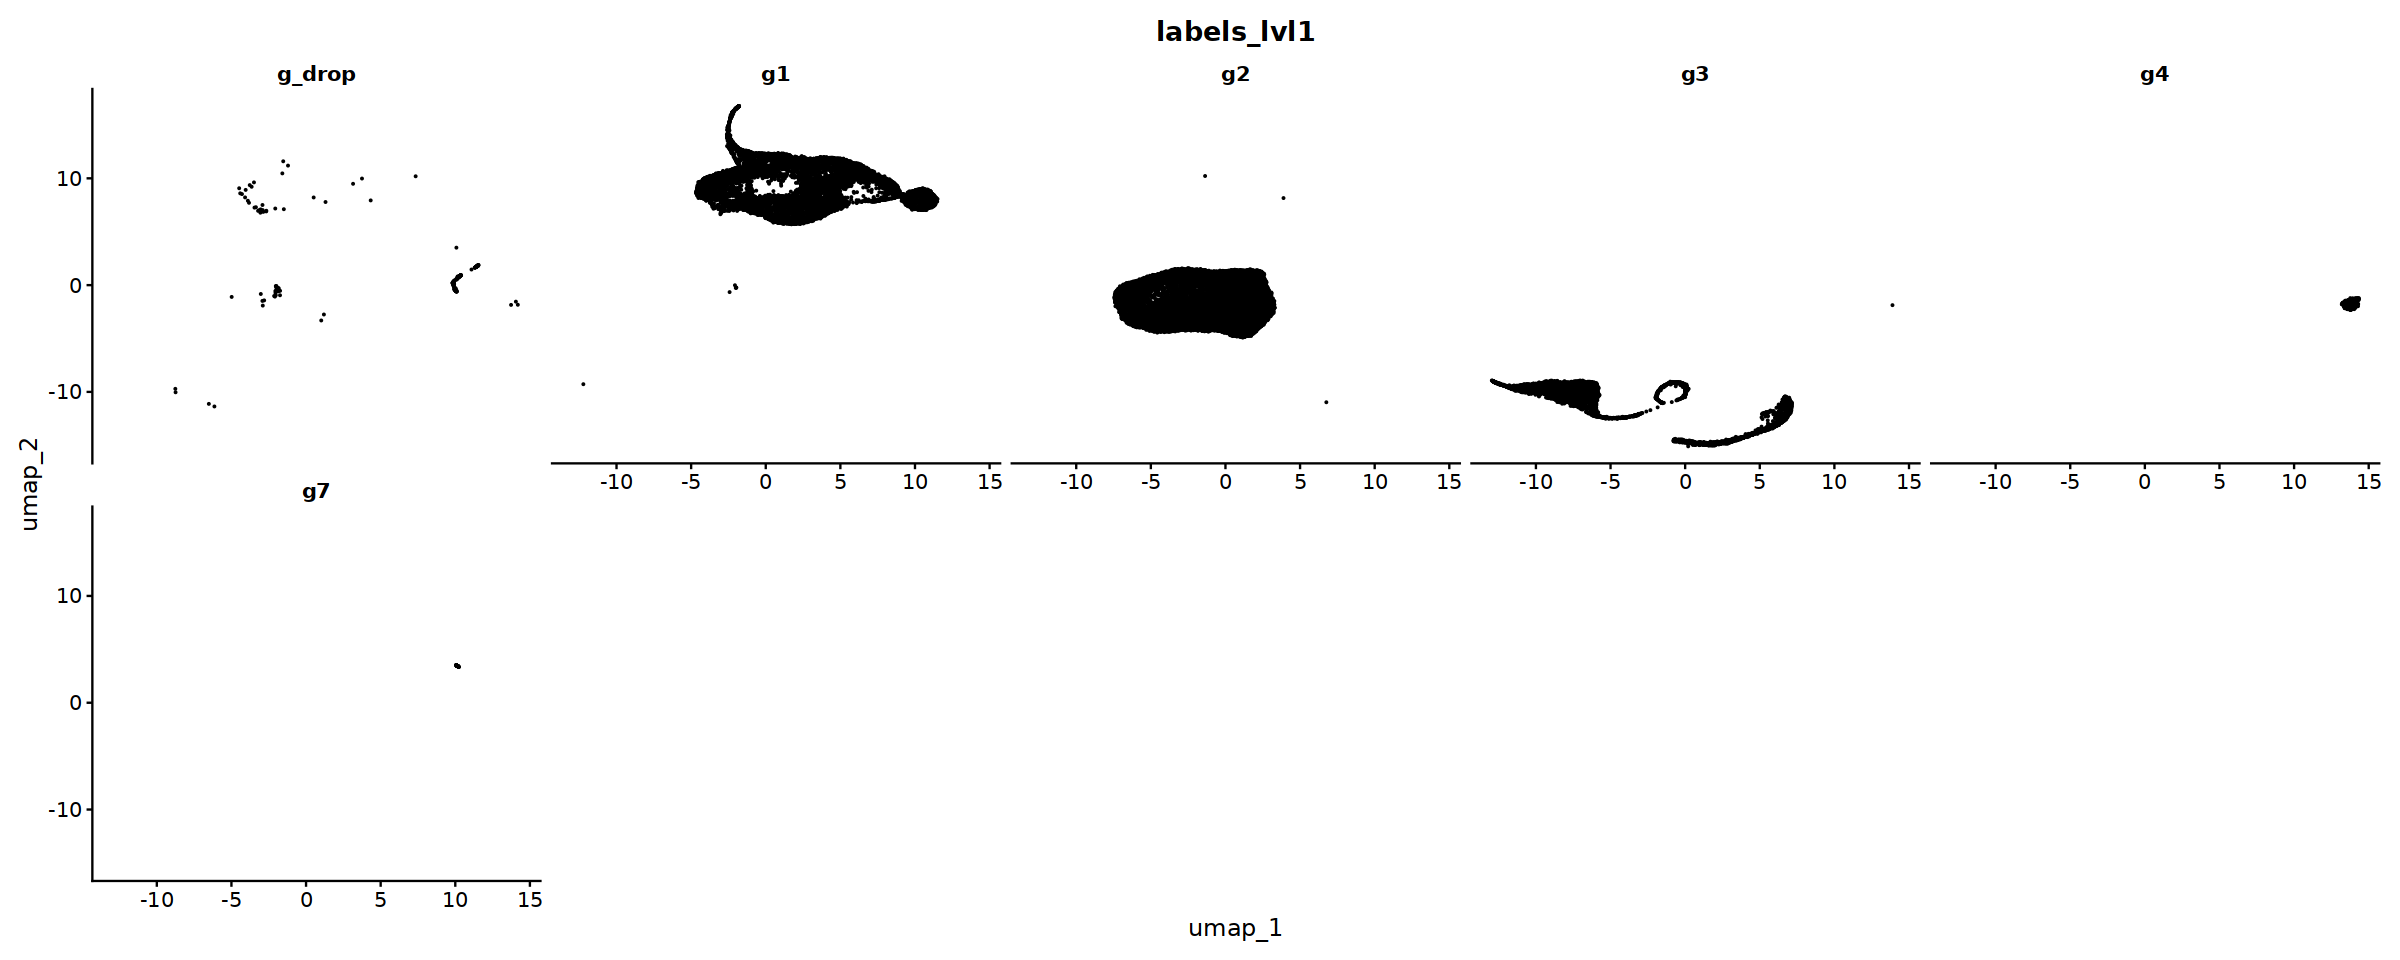

In [56]:
options(repr.plot.width=20, repr.plot.height=8)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_chunk', ncol=5) + NoLegend()

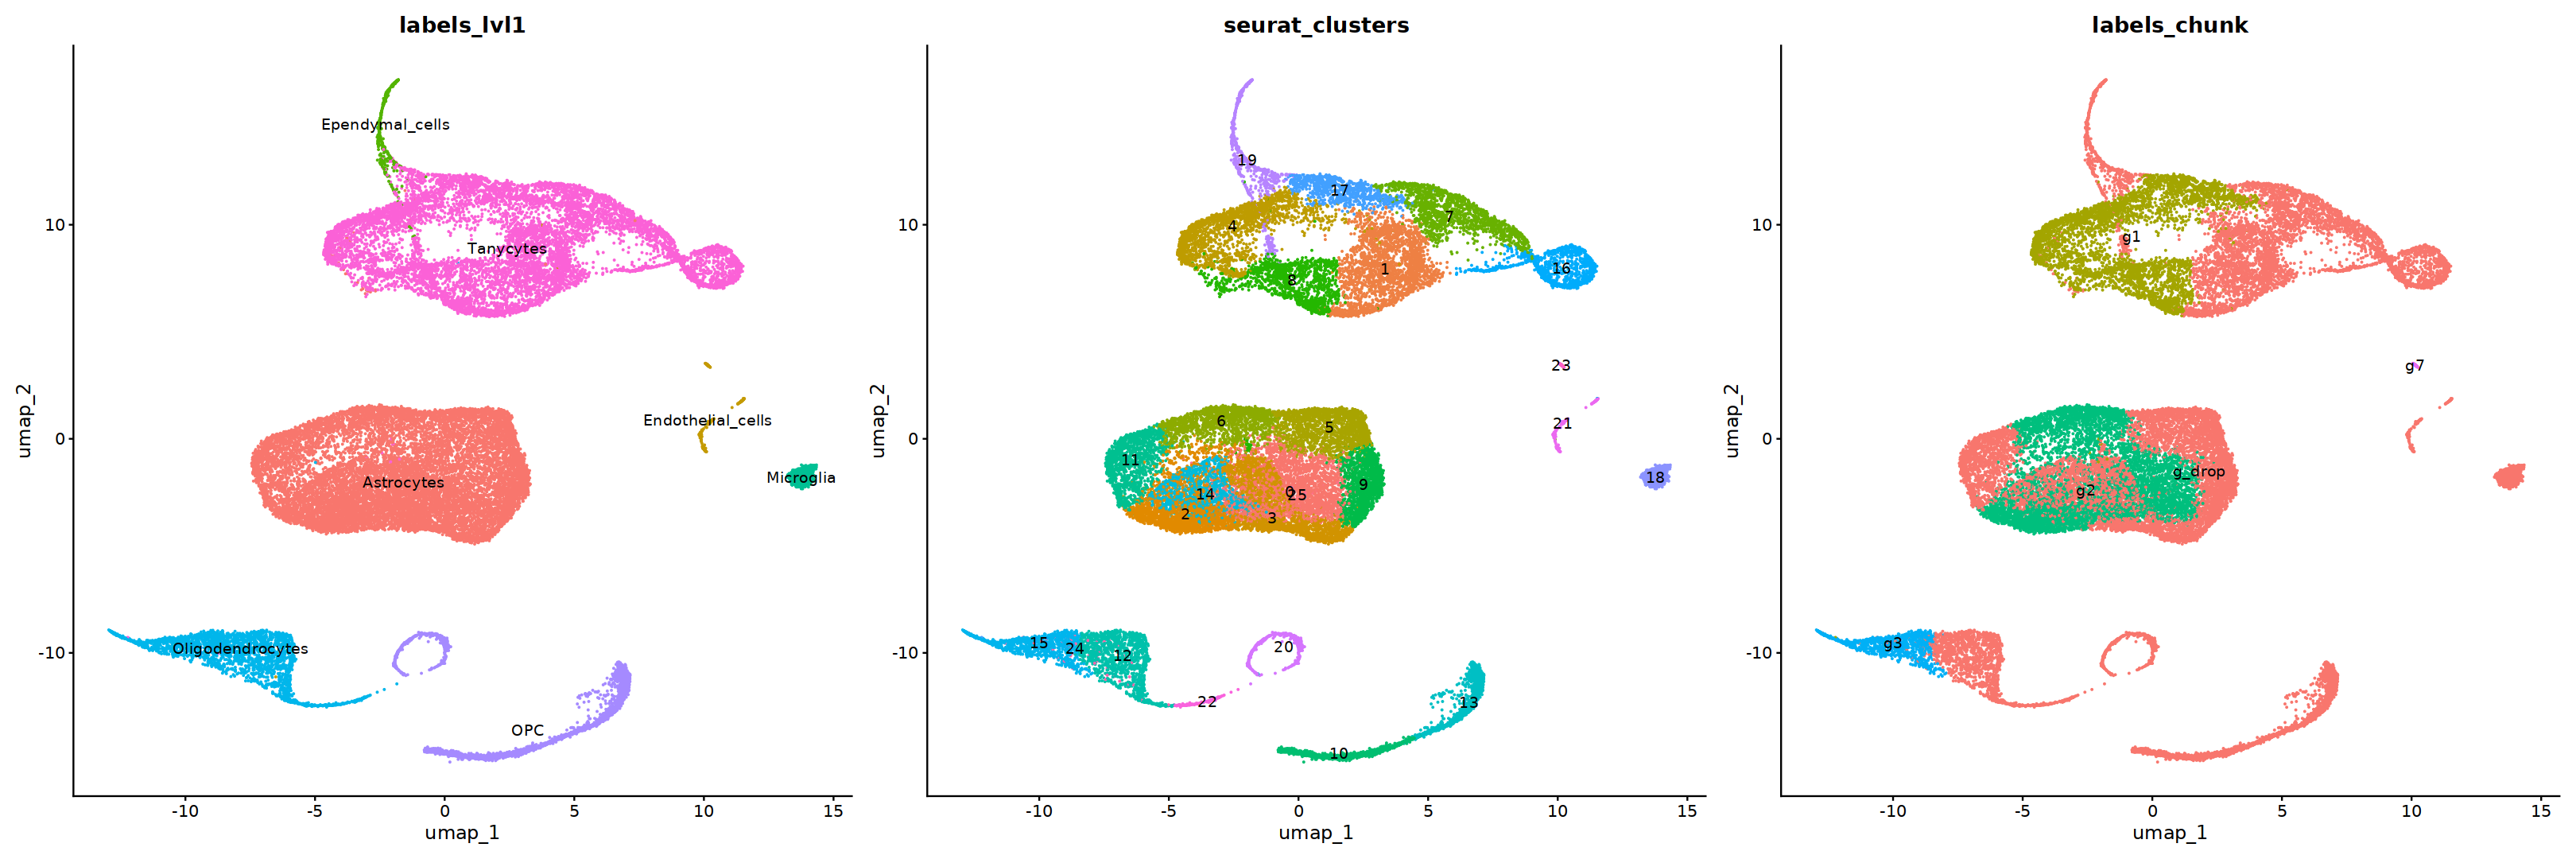

In [43]:
options(repr.plot.width=27, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_chunk = DimPlot(obj, reduction = "umap", group.by='labels_chunk', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters + p_labels_chunk

In [44]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1"                       
[37] "labels_chunk"

In [45]:
create_freq_df_per_cluster <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = labels, value = freq, fill = 0)
    freq_df

}

create_freq_df_per_label <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = seurat_clusters, value = freq, fill = 0)
    freq_df

}



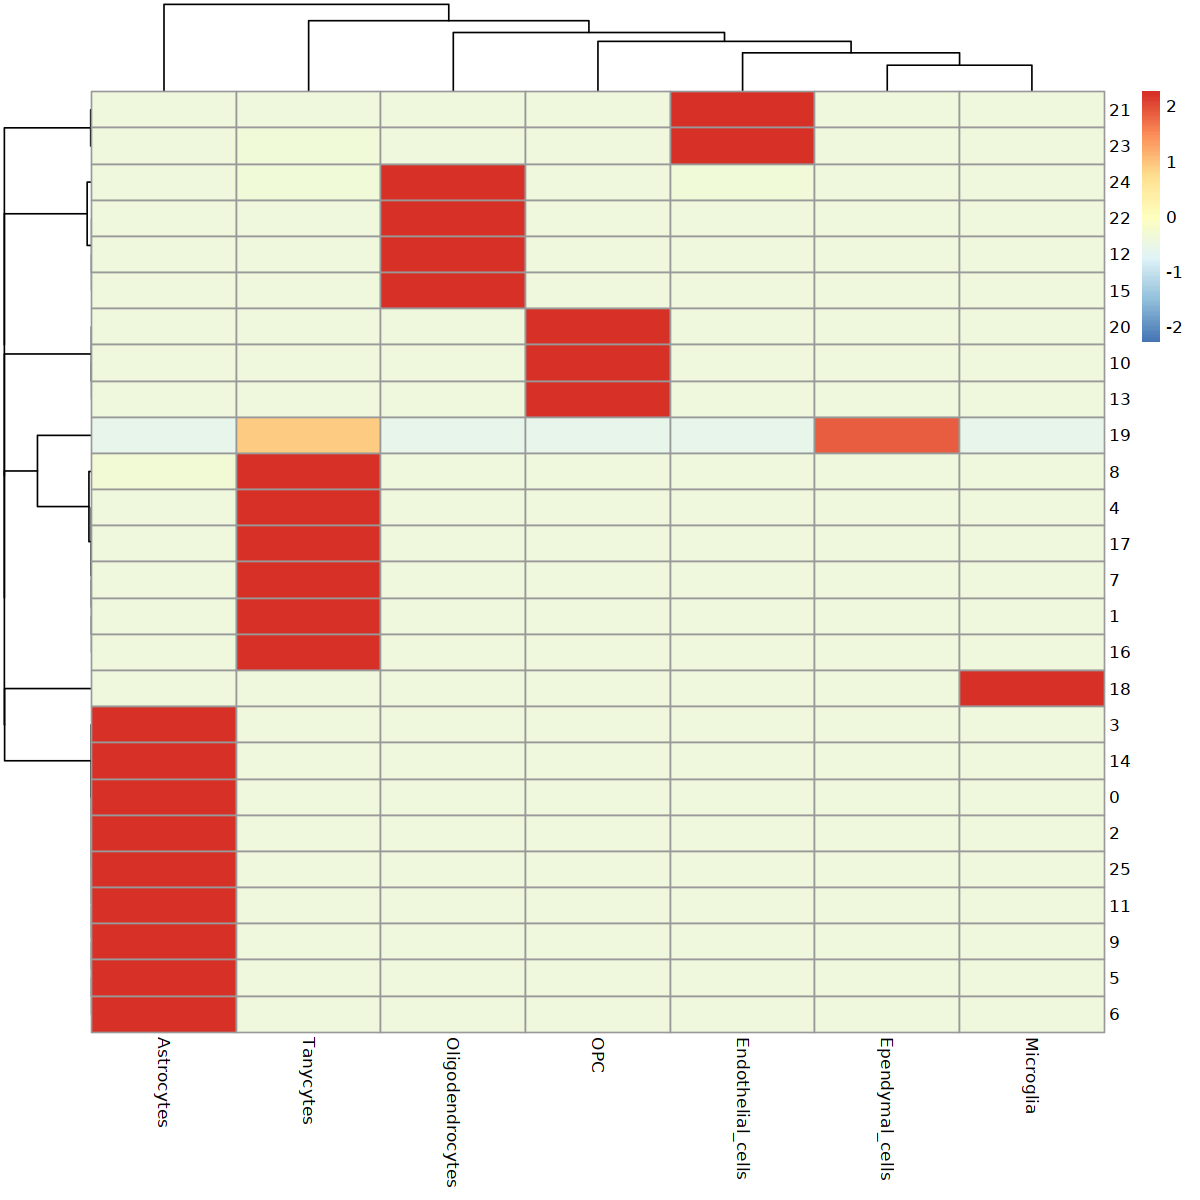

In [46]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


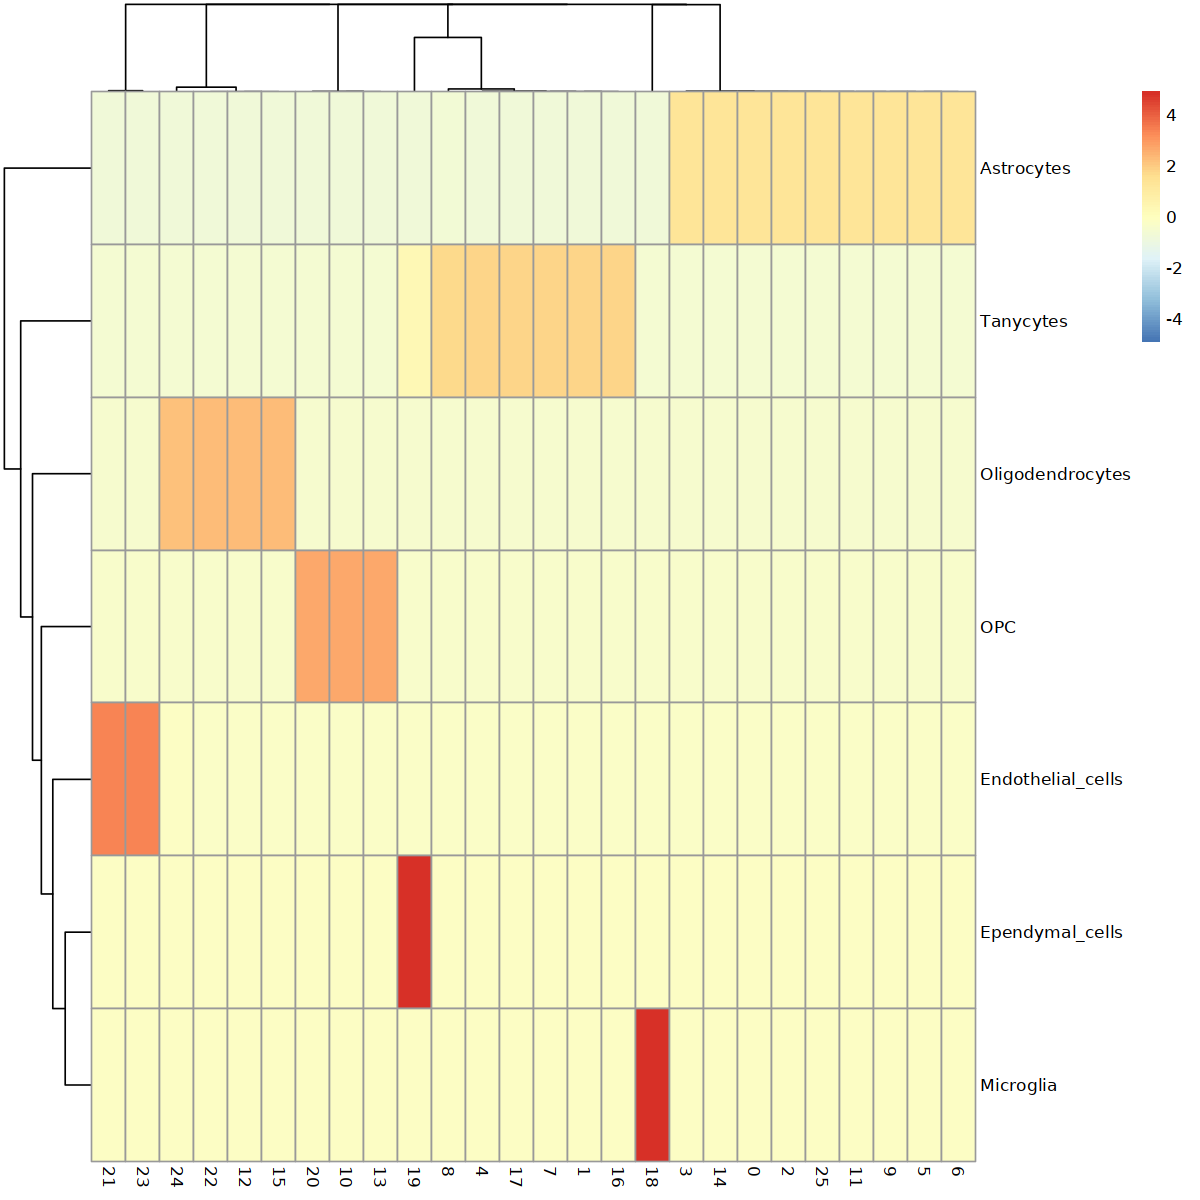

In [47]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_label(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


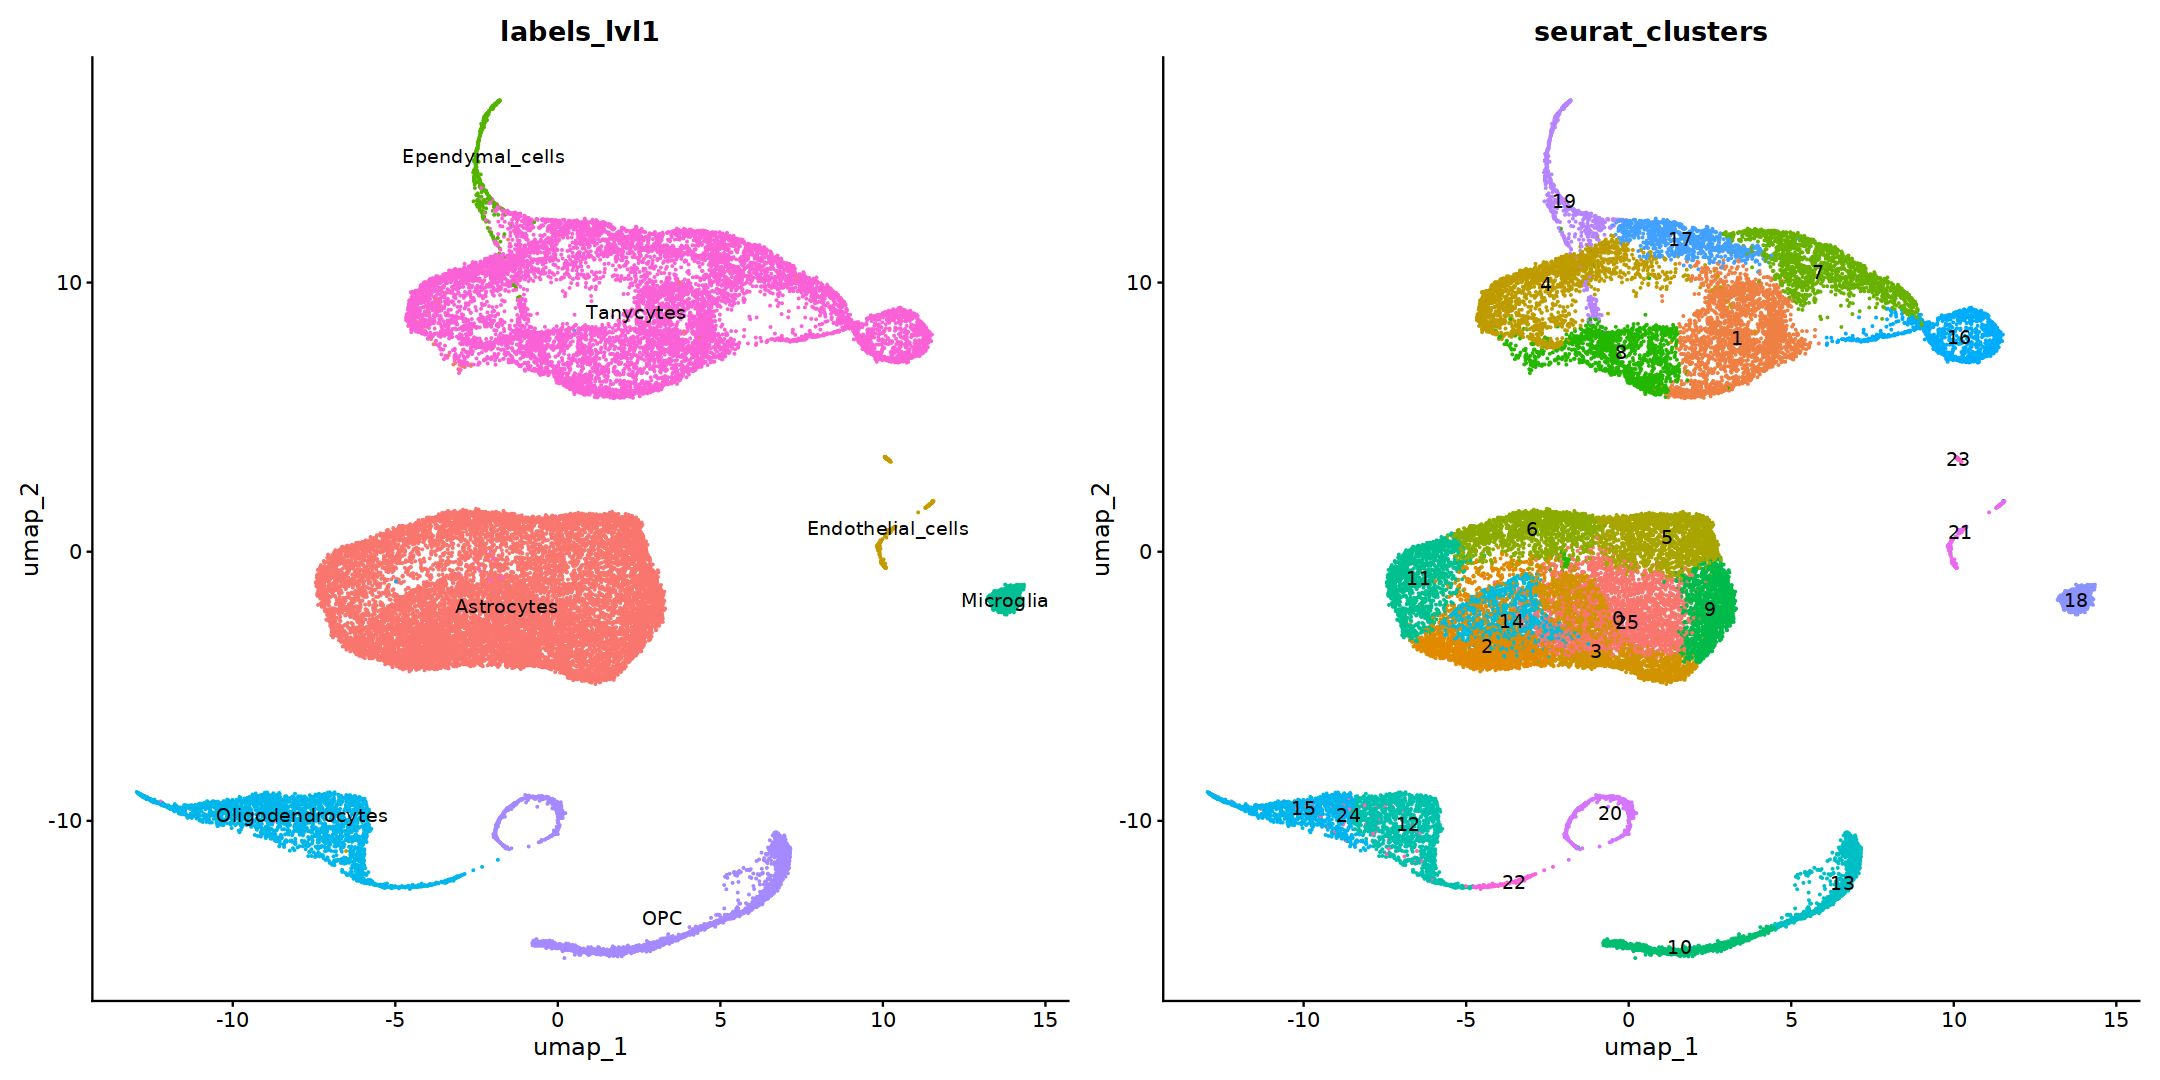

In [48]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters